Params
- Weather : Rain apcpsfc, Humidity rhprs, Temp tmpsfc, MSLP prmslmsl
- Wind & Waves: wind ugrdsfc-vgrdsfc, swh htsgwsfc-dirpwsfc, swell_1-swdir_1
- Ocean: Current, SST, SSS, SSH, 

URL:
- Weather
- Wind & Waves
- Ocean

# 1 Weather

In [1]:
import xarray as xr
import cartopy

In [7]:
cartopy.config

{'pre_existing_data_dir': PosixPath('.'),
 'data_dir': PosixPath('/home/yothunder/.local/share/cartopy'),
 'cache_dir': PosixPath('/tmp/cartopy_cache_dir'),
 'repo_data_dir': PosixPath('/home/yothunder/miniconda3/envs/nusawave/lib/python3.14/site-packages/cartopy/data'),
 'downloaders': {('shapefiles',
   'natural_earth'): <cartopy.io.shapereader.NEShpDownloader at 0x7f3455e6f0e0>,
  ('shapefiles',
   'gshhs'): <cartopy.io.shapereader.GSHHSShpDownloader at 0x7f3455e6fcb0>}}

In [2]:
url = "http://nomads.ncep.noaa.gov:80/dods/gfs_0p25_1hr/gfs20251127/gfs_0p25_1hr_00z"
dset = xr.open_dataset(url)
dset

/home/yothunder/miniconda3/envs/ww3/lib/python3.12/site-packages/xarray/coding/times.py:187: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)


<xarray.Dataset> Size: 430GB
Dimensions:         (time: 121, lev: 41, lat: 721, lon: 1440)
Coordinates:
  * time            (time) datetime64[ns] 968B 2025-11-27 ... 2025-12-02
  * lev             (lev) float64 328B 1e+03 975.0 950.0 ... 0.04 0.02 0.01
  * lat             (lat) float64 6kB -90.0 -89.75 -89.5 ... 89.5 89.75 90.0
  * lon             (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables: (12/215)
    absvprs         (time, lev, lat, lon) float32 21GB ...
    no4lftxsfc      (time, lat, lon) float32 503MB ...
    acpcpsfc        (time, lat, lon) float32 503MB ...
    albdosfc        (time, lat, lon) float32 503MB ...
    apcpsfc         (time, lat, lon) float32 503MB ...
    capesfc         (time, lat, lon) float32 503MB ...
    ...              ...
    vwshneg2pv      (time, lat, lon) float32 503MB ...
    vwshtrop        (time, lat, lon) float32 503MB ...
    watrsfc         (time, lat, lon) float32 503MB ...
    weasdsfc        (time, lat, lon) float32 503MB ...
    wiltsfc         (time, lat, lon) float32 503MB ...
    var00212m       (time, lat, lon) float32 503MB ...
Attributes:
    title:        GFS 0.25 deg starting from 00Z27nov2025, downloaded Nov 27 ...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Thu Nov 27 05:18:07 UTC 2025 : imported by GrADS Data Serve...

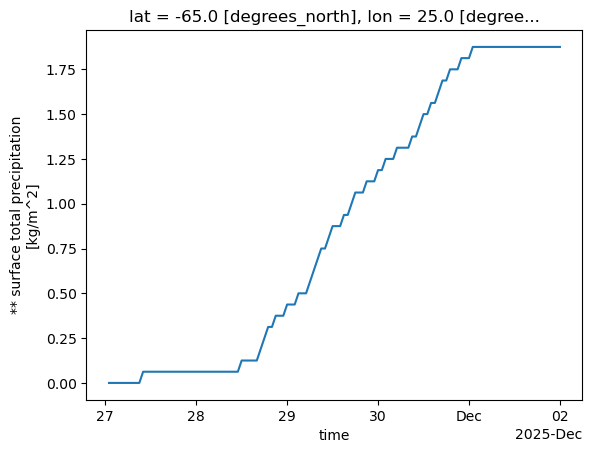

In [5]:
dset.apcpsfc.isel(lon=100, lat=100).plot()

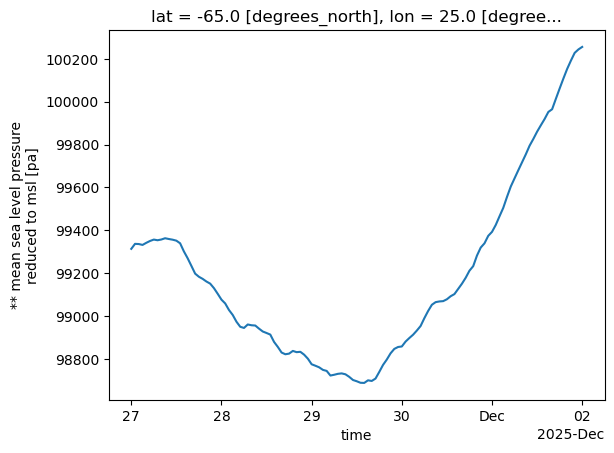

In [6]:
dset.prmslmsl.isel(lon=100, lat=100).plot()

# 2 Wind Waves

In [7]:
dsetwave = xr.open_dataset("http://nomads.ncep.noaa.gov:80/dods/wave/gfswave/20251127/gfswave.global.0p25_00z")
dsetwave

/home/yothunder/miniconda3/envs/ww3/lib/python3.12/site-packages/xarray/coding/times.py:187: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)


<xarray.Dataset> Size: 10GB
Dimensions:   (time: 129, lat: 721, lon: 1440)
Coordinates:
  * time      (time) datetime64[ns] 1kB 2025-11-27 ... 2025-12-13
  * lat       (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon       (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Data variables: (12/19)
    dirpwsfc  (time, lat, lon) float32 536MB ...
    htsgwsfc  (time, lat, lon) float32 536MB ...
    perpwsfc  (time, lat, lon) float32 536MB ...
    swdir_1   (time, lat, lon) float32 536MB ...
    swdir_2   (time, lat, lon) float32 536MB ...
    swdir_3   (time, lat, lon) float32 536MB ...
    ...        ...
    vgrdsfc   (time, lat, lon) float32 536MB ...
    wdirsfc   (time, lat, lon) float32 536MB ...
    windsfc   (time, lat, lon) float32 536MB ...
    wvdirsfc  (time, lat, lon) float32 536MB ...
    wvhgtsfc  (time, lat, lon) float32 536MB ...
    wvpersfc  (time, lat, lon) float32 536MB ...
Attributes:
    title:        GFSwave model: Global 0p25deg grid from 00Z27nov2025 downlo...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Thu Nov 27 05:20:37 UTC 2025 : imported by GrADS Data Serve...